# Introduction

Het onderwerp van het onderzoek zal gefocust zijn op de stijgende hypotheekschulden en of dit een probleem is of niet. De afgelopen jaren is er (in de data te zien) een stijging in de hypotheekschulden, maar dit wil niet gelijk zeggen dat dit een probleem is. De stijgende schulden kunnen gelinkt worden aan andere informatie uit de data en hierdoor kunnen dan stellingen gedaan worden over het feit dat de schulden stijgen. 

Het eerste perspectief is dat mensen de stijgende hypotheekschulden geen probleem vinden, de reden hiervoor is dat niet alleen de schulden stijgen maar ook het bruto-inkomen. Dit perspectief is gebaseerd op het feit dat mensen met een hoger inkomen, een grotere financiële zekerheid hebben en hierdoor meer vertrouwen zullen hebben dat een toenemende schuld wel opgevangen kan worden. 

Het tweede perspectief is dat mensen de stijgende hypotheekschulden geen probleem vinden, omdat de financiële tevredenheid stijgt en omdat de zorgen over financiële toekomst dalen. Dit perspectief is gebaseerd op het feit dat mensen die financieel tevreden zijn vaak beter met stijgende schuld om zullen kunnen gaan en het feit dat mensen die minder zorgen hebben over de financiële toekomst ook beter zullen kunnen omgaan met stijgende schuld.

# Dataset and preprocessing

### [Dataset 1](https://opendata.cbs.nl/statline/portal.html?_la=nl&_catalog=CBS&tableId=85162NED&_theme=190)
Deze dataset bevat info over het financieel risico voor huiseigenaren. Hypytheekschuld, woningwaarde en inkomen worden aan elkaar gekoppeld. Hierbij word er onderscheid gemaakt tussen de resultaten met factoren op basis van huishoudsamenstelling, leeftijd van de kostwinner, inkomens groepen en vermogensgroepen. Er zijn drie belangrijke
metingen van financieel risico, hypotheekschuld/woningwaarde (LTV), hypotheekschuld/bruto inkomen en hypotheekschuld/besteedbaar inkomen.

### [Dataset 2](https://opendata.cbs.nl/statline/portal.html?_la=nl&_catalog=CBS&tableId=85558NED&_theme=168)
De dataset bevat cijfers over welzijn in relatie met financiën. De cijfers over welzijn gaan over de bevolking van Nederland van 18 jaar of ouder. Dit wordt gedaan door middel van termen van geluk en tevredenheid met de financiële situatie (en het leven). Ook worden de mate van zorgen over de financiële toekomst opgenomen. Deze (financiële)] onderwerpen zijn verder opgesplitst in meerdere kenmerken.

### Preprocessing
Voor de eerste stap van de dataverwerking hebben we de gegevens ingeladen met Pandas. We hebben beide datasets ingeladen met sep=";" als parameter aangezien de csv bestanden een punt komma gebruikte als scheidingsteken. Daarna hebben we de kolomnamen van beide datasets gestandaardiseerd door spaties te vervangen door underscores. Dit hebben we gedaan zodat er makkelijker te refereren is naar deze kolommen. Ontbrekende waardes in de datasets werden aangegeven met een . maar dit hebben we veranderd naar NaN zodat Pandas dit beter herkend als ontbrekende waardes. 

Ook doen we voor een aantal relevante kolommen de waardes veranderen naar een numeric value in plaats van een string omdat het cbs de kolommen in een string aanlevert en Pandas dit niet herkend. Daarnaast veranderen we de Perioden kolom. In de originele 2 datasets word er na elk jaartal 'JJ00' gezet. Dit gaan we voor elk jaar weghalen zodat dit een integer word waarmee we met Pandas kunnen werken.

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go
import plotly.express as px

# Color theme for using in visualisations
color_scale = ['#40513B', '#31a354', '#9DC08B']

# Loading datasets
df_tevredenheid = pd.read_csv('tevredenheid.csv', sep=";")
df_schuld = pd.read_csv('schuld.csv', sep=";")

# Replace spaces with underscores
df_tevredenheid.columns = df_tevredenheid.columns.str.replace(' ', '_')
df_schuld.columns = df_schuld.columns.str.replace(' ', '_')

# Replace '.' with NaN
df_tevredenheid.replace('.', np.nan, inplace=True)
df_schuld.replace('.', np.nan, inplace=True)

# Convert string to numeric
df_tevredenheid['ScoreGeluk_1'] = pd.to_numeric(df_tevredenheid['ScoreGeluk_1'], errors='coerce')
df_schuld['GemiddeldeHypotheekschuldEigenWoning_2'] = pd.to_numeric(df_schuld['GemiddeldeHypotheekschuldEigenWoning_2'], errors='coerce')
df_schuld['GemiddeldBesteedbaarInkomen_5'] = pd.to_numeric(df_schuld['GemiddeldBesteedbaarInkomen_5'], errors='coerce')
df_tevredenheid['ScoreTevredenheidFinancieleSituatie_9'] = pd.to_numeric(df_tevredenheid['ScoreTevredenheidFinancieleSituatie_9'], errors='coerce')
df_tevredenheid['ScoreZorgenOverFinancieleToekomst_13'] = pd.to_numeric(df_tevredenheid['ScoreZorgenOverFinancieleToekomst_13'], errors='coerce')

# Cleaning the Perioden column
df_tevredenheid['Perioden_clean'] = df_tevredenheid['Perioden'].str.replace('JJ00', '').astype(int)
df_schuld['Perioden_clean'] = df_schuld['Perioden'].str.replace('JJ00', '').astype(int)

# Visualization 1

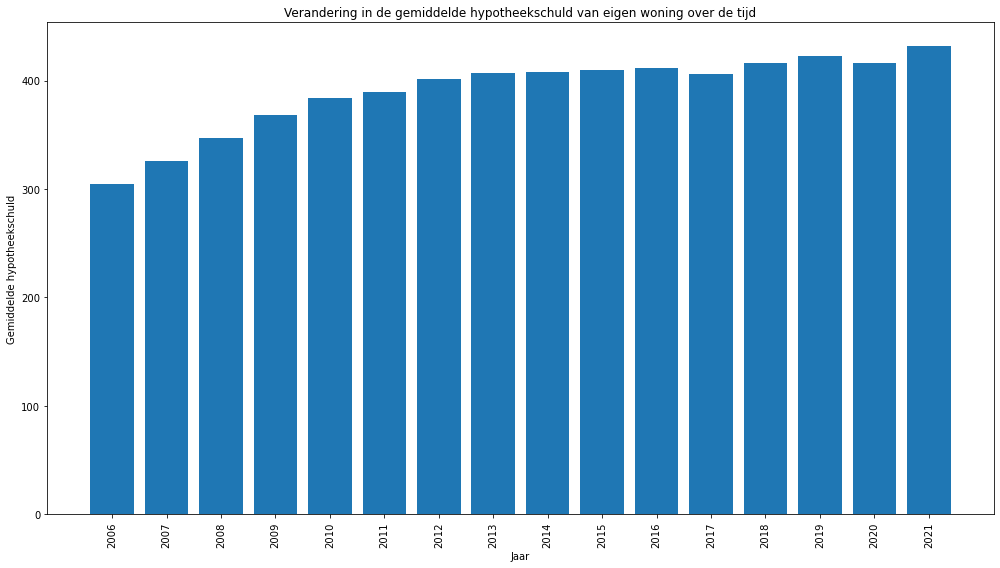

In [78]:
df_schuld['Perioden'] = df_schuld['Perioden'].str.slice(0, 4)

plt.figure(figsize=(14,8))
plt.bar(df_schuld['Perioden'], df_schuld['GemiddeldeHypotheekschuldEigenWoning_2'])
plt.title('Verandering in de gemiddelde hypotheekschuld van eigen woning over de tijd')
plt.xlabel('Jaar')
plt.ylabel('Gemiddelde hypotheekschuld')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

# Visualization 2

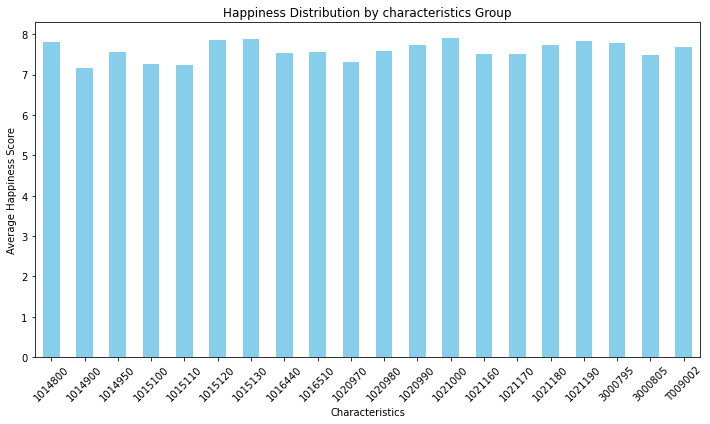

In [79]:
age_group_happiness = df_tevredenheid.groupby('Kenmerken')['ScoreGeluk_1'].mean()

plt.figure(figsize=(10, 6))
age_group_happiness.plot(kind='bar', color='skyblue')
plt.title('Happiness Distribution by characteristics Group')
plt.xlabel('Characteristics')
plt.ylabel('Average Happiness Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 3

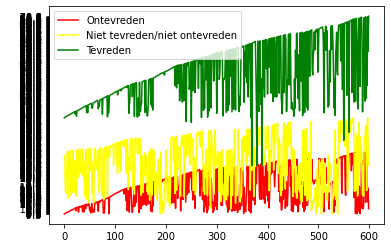

In [80]:
plt.plot(df_tevredenheid['Ontevreden_10'], color='red', label='Ontevreden')
plt.plot(df_tevredenheid['NietTevredenNietOntevreden_11'], color='yellow', label='Niet tevreden/niet ontevreden')
plt.plot(df_tevredenheid['Tevreden_12'], color='green', label='Tevreden')


plt.legend()
plt.show()

# Visualization 4

In [81]:
bar_colors = ['rgb(255, 0, 0)', 'rgb(255, 255, 0)', 'rgb(0, 255, 0)']
bar_names = ['Ontevreden', 'Niet tevreden / niet ontevreden', 'Tevreden']
tevredenheid = [df_tevredenheid['Ontevreden_10'], df_tevredenheid['NietTevredenNietOntevreden_11'], df_tevredenheid['Tevreden_12']]

traces = []

for index, satisf in enumerate(tevredenheid):
    trace = go.Bar(
        x=df_tevredenheid['Perioden_clean'],
        y=satisf,
        name=bar_names[index],
        marker=dict(color=bar_colors[index])
    )
    traces.append(trace)

layout = go.Layout(
    title='Financiële tevredenheid over de jaren',
    xaxis=go.layout.XAxis(title='Jaar', type='category'),
    yaxis=go.layout.YAxis(title='Percentage van mensen', tickformat=',.0%'),
    barmode='group',
    height=400
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

# Sketch 1 

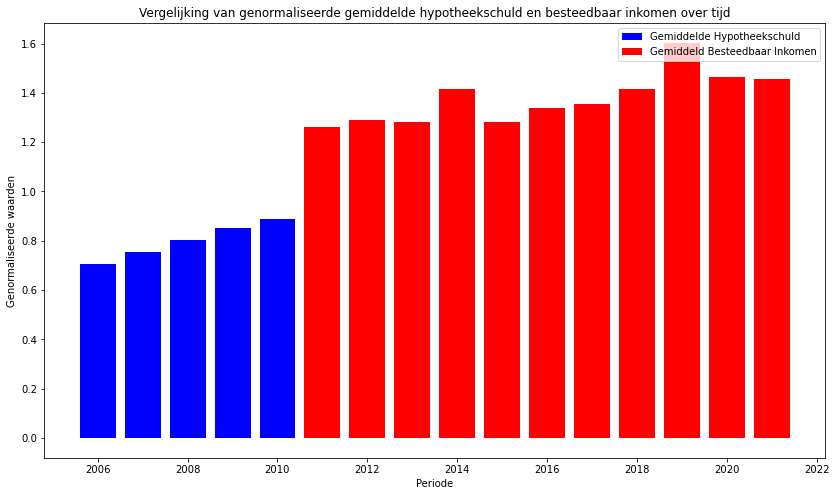

In [82]:
# Normalizing the data for better comparison
df_schuld['GemiddeldeHypotheekschuldEigenWoning_2_norm'] = df_schuld['GemiddeldeHypotheekschuldEigenWoning_2'] / df_schuld['GemiddeldeHypotheekschuldEigenWoning_2'].max()
df_schuld['GemiddeldBesteedbaarInkomen_5_norm'] = df_schuld['GemiddeldBesteedbaarInkomen_5'] / df_schuld['GemiddeldBesteedbaarInkomen_5'].max()

# Plotting
plt.figure(figsize=(14,8))
bar1 = np.arange(len(df_schuld['Perioden_clean']))
bar2 = [i+j for i,j in zip(df_schuld['GemiddeldeHypotheekschuldEigenWoning_2_norm'], df_schuld['GemiddeldBesteedbaarInkomen_5_norm'])]

plt.bar(df_schuld['Perioden_clean'], df_schuld['GemiddeldeHypotheekschuldEigenWoning_2_norm'], color='b', label='Gemiddelde Hypotheekschuld')
plt.bar(df_schuld['Perioden_clean'], df_schuld['GemiddeldBesteedbaarInkomen_5_norm'], bottom=df_schuld['GemiddeldeHypotheekschuldEigenWoning_2_norm'], color='r', label='Gemiddeld Besteedbaar Inkomen')

plt.xlabel('Periode')
plt.ylabel('Genormaliseerde waarden')
plt.title('Vergelijking van genormaliseerde gemiddelde hypotheekschuld en besteedbaar inkomen over tijd')
plt.legend()
plt.show()

# Sketch 3

<Figure size 864x720 with 0 Axes>

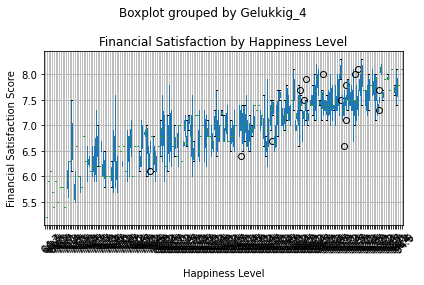

In [83]:
plt.figure(figsize=(12, 10));
df_tevredenheid.boxplot(column=['ScoreTevredenheidFinancieleSituatie_9'], by='Gelukkig_4')
plt.title('Financial Satisfaction by Happiness Level')
plt.xlabel('Happiness Level')
plt.ylabel('Financial Satisfaction Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisation

In [96]:
# Plotly express color workaround
df_tevredenheid['color'] = 'Box Color'

# Plot graph 
fig = px.box(df_tevredenheid, x='Perioden_clean', y='ScoreZorgenOverFinancieleToekomst_13', 
             height=600, title='Zorgen over financiele toekomst per jaar', color='color')

fig.update_traces(marker=dict(color=color_scale[1]))

fig.update_layout(yaxis_title='Zorgen over financiele toekomst', xaxis_title='Jaar', showlegend=False)
fig.show()

# Visualisation

In [93]:
# Average income over time
time_income = df_schuld.groupby('Perioden_clean')['GemiddeldBesteedbaarInkomen_5'].mean()
time_income_df = time_income.reset_index().rename(columns={'Perioden_clean': 'Jaar', 'GemiddeldBesteedbaarInkomen_5': 'Gemiddeld Inkomen'})

# Debt over time, 2013 since that matches the income starting date 
time_debt = df_schuld[df_schuld['Perioden_clean'] >= 2013].groupby('Perioden_clean')['GemiddeldeHypotheekschuldEigenWoning_2'].mean()
time_debt_df = time_debt.reset_index().rename(columns={'Perioden_clean': 'Jaar', 'GemiddeldeHypotheekschuldEigenWoning_2': 'Gemiddelde Schuld'})

# Combine both over year 
combined_income_debt_df = pd.merge(time_debt_df, time_income_df, on='Jaar')

# Normalize both 
combined_income_debt_df['Gemiddelde Schuld'] = (combined_income_debt_df['Gemiddelde Schuld'] - combined_income_debt_df['Gemiddelde Schuld'].min()) / (combined_income_debt_df['Gemiddelde Schuld'].max() - combined_income_debt_df['Gemiddelde Schuld'].min())
combined_income_debt_df['Gemiddeld Inkomen'] = (combined_income_debt_df['Gemiddeld Inkomen'] - combined_income_debt_df['Gemiddeld Inkomen'].min()) / (combined_income_debt_df['Gemiddeld Inkomen'].max() - combined_income_debt_df['Gemiddeld Inkomen'].min())

melted_income_debt_df = combined_income_debt_df.melt(id_vars='Jaar', value_vars=['Gemiddelde Schuld', 'Gemiddeld Inkomen'], var_name='Metric', value_name='Value')

# Plot graph
fig = px.line(melted_income_debt_df, x='Jaar', y='Value', color='Metric', title='Gemiddelde schuld en inkomen genormaliseerd per jaar', color_discrete_sequence = color_scale)
fig.update_layout(yaxis_title='', legend_title='')
fig.show()

Perspectief 1
-	Door de stijgende inkomens hebben mensen meer financiële ruimte en kunnen ze zich comfortabel voelen bij het aangaan van een hogere hypotheekschuld. Het toenemende bruto-inkomen biedt hen de zekerheid dat ze de stijgende schuld kunnen opvangen zonder in financiële moeilijkheden te komen.
- 

Perspectief 2
-	Wanneer mensen optimistisch zijn over hun financiële toekomst, hebben ze meer vertrouwen in hun vermogen om met stijgende schulden om te gaan. Ze geloven dat ze in staat zullen zijn om hun financiële doelen te bereiken en eventuele schulden effectief af te betalen, waardoor ze minder zorgen hebben over de gevolgen van een toenemende schuld.
-	Als mensen tevreden zijn over hun financiële situatie, zijn ze beter in staat om met stijgende schulden om te gaan. Ze hebben minder angst en stress over hun financiën, wat hen helpt om de impact van toenemende schulden te minimaliseren.

a